In [1]:
import re
import time
import pandas as pd
import json
import requests
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import tqdm
from bs4 import BeautifulSoup
from tqdm import tqdm
from datetime import datetime

# 1. 당일 데이터 분석

In [7]:
pd.options.display.float_format = '{:.3f}'.format

## 2023년 3월 13일

In [38]:
stock_0313 = pd.read_csv('data/20230313.csv')
stock_0313['day_change_per'] = stock_0313.filter(items=['stck_oprc','stck_hgpr']).pct_change(axis=1)['stck_hgpr']
stock_0313

,stock_code,stock_name,stock_class,gap_per,gap_hour,gap_int,stck_oprc,stck_hgpr,stck_lwpr_D_10,stck_lwpr_D_9,...,acml_vol_D_1,acml_vol_D_0,gap_change,mean_vlome,today_vlome,volume_change,slope,day_change,deter_change,day_change_per
0,F70101B95,밀라노부동산,kospi,6.450,90030,6,990,990,990,990,...,6,1,6,3.889,1,-0.743,0.005,0,0,0.000
1,002350,넥센타이어,kospi,10.460,90030,10,8190,8470,7600,7490,...,80964,1506474,10,88808.300,1506474,15.963,0.001,280,1,0.034
2,002355,넥센타이어1우B,kospi,4.010,90010,4,2980,2980,2860,2860,...,2614,52075,4,4614.000,52075,10.286,0.002,0,0,0.000
3,002760,보락,kospi,13.600,90008,13,1710,1880,1686,1660,...,350499,3364810,13,251448.800,3364810,12.382,0.003,170,1,0.099
4,003550,LG,kospi,2.790,90029,2,88200,92600,83700,82200,...,1407001,1294277,2,226203.700,1294277,4.722,0.000,4400,1,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,323990,박셀바이오,kospi,5.960,90030,5,42800,43500,34900,34050,...,6571336,1916990,5,125069.625,1916990,14.327,0.000,700,1,0.016
87,351320,에스에이티이엔지,kospi,10.450,90030,10,4890,5370,3360,3300,...,4328044,11674845,10,322905.111,11674845,35.156,0.000,480,1,0.098
88,351330,이삭엔지니어링,kospi,12.290,90030,12,12420,13300,9810,9710,...,4178310,3444152,12,57690.667,3444152,58.700,0.000,880,1,0.071
89,366330,신한제7호스팩,kospi,3.510,90030,3,2210,2310,2130,2150,...,13675,109194,3,25548.600,109194,3.274,0.002,100,1,0.045


In [26]:
data_0313 = stock_0313.iloc[:,30:]
data_0313 = data_0313.drop(index=data_0313.query('volume_change>1000000').index[0]).reset_index(drop=True)

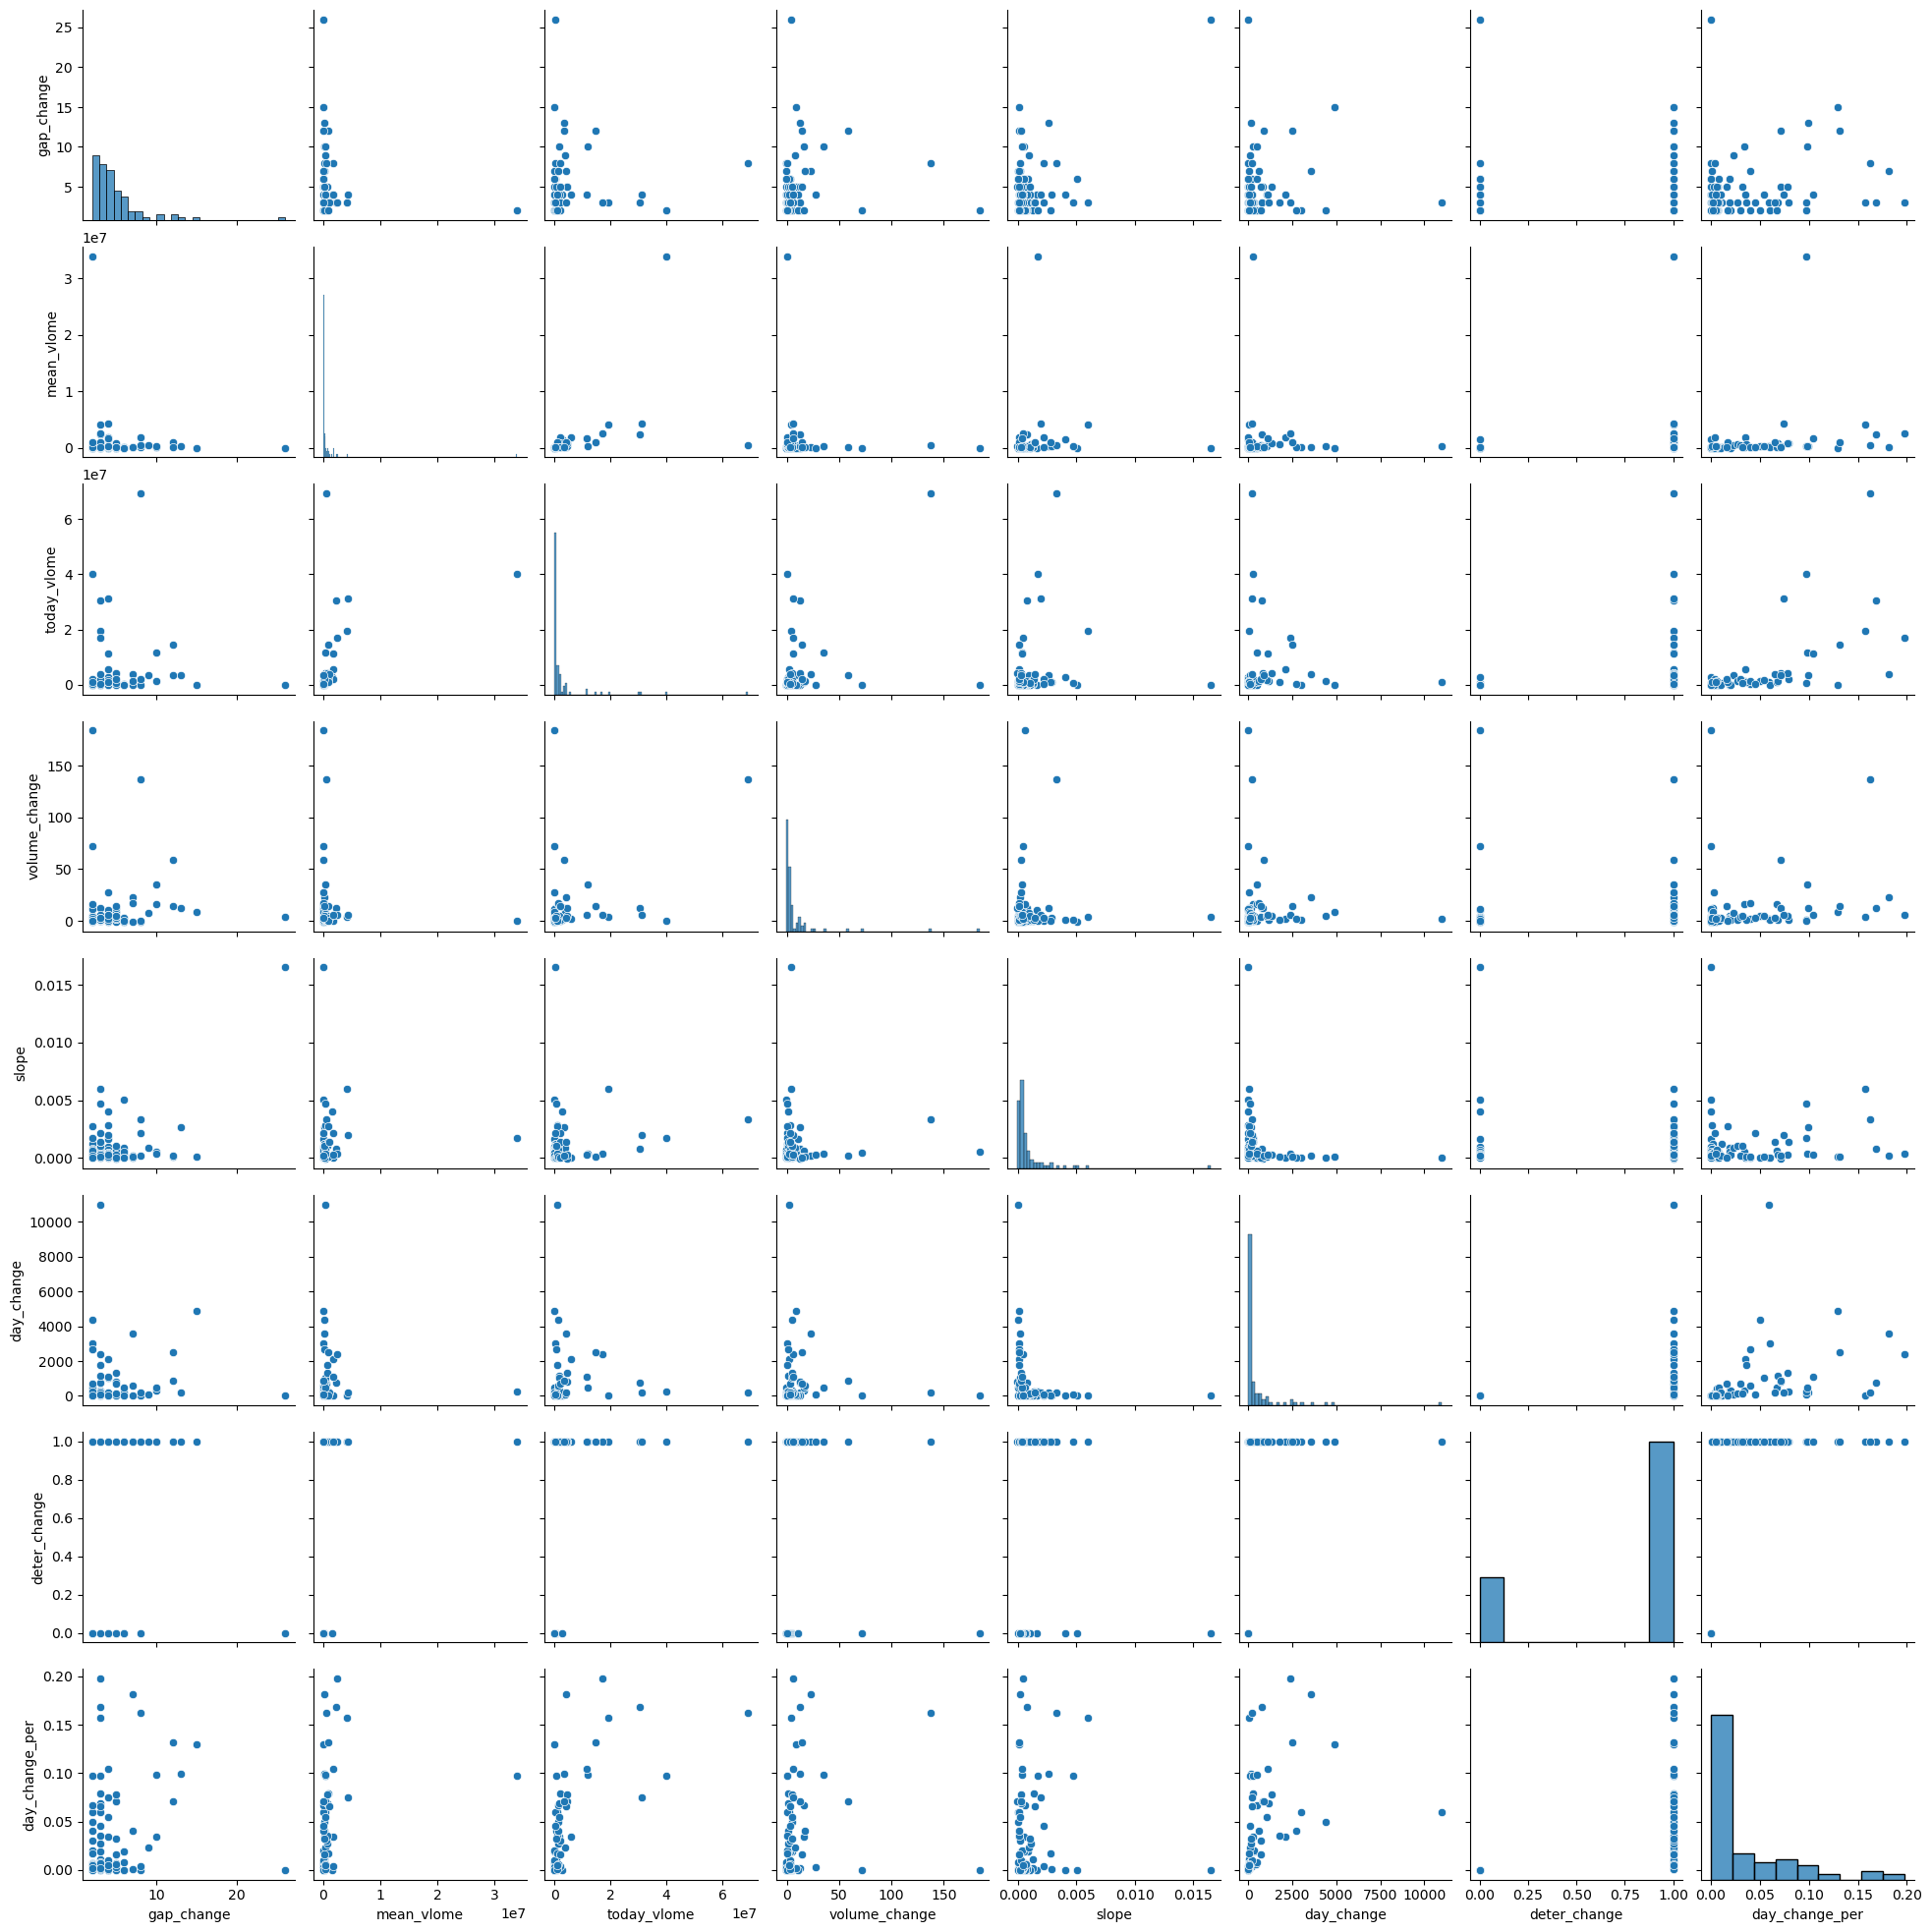

In [27]:
%matplotlib inline
sns.pairplot(data_0313)

In [28]:
model = sm.OLS.from_formula('day_change_per ~ gap_change + mean_vlome + today_vlome+  volume_change + slope ', data_0313).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         day_change_per   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     13.20
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.74e-09
Time:                        23:09:22   Log-Likelihood:                 172.52
No. Observations:                  90   AIC:                            -333.0
Df Residuals:                      84   BIC:                            -318.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0142      0.007      2.104      0.038       0.001       0.028
gap_change        0.0028      0.001      2.088      0.040       0.000       0.005
mean_vlome    -9.962e-10   1.32e-09     -0.756      0.452   -3.62e-09    1.62e-09
today_vlome    3.488e-09   5.26e-10      6.632      0.000    2.44e-09    4.53e-09
volume_change    -0.0002      0.000     -1.043      0.300      -0.001       0.000
slope            -3.4499      2.341     -1.474      0.144      -8.105       1.205
==============================================================================
Omnibus:                       35.162   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.656
Skew:                           1.538   Prob(JB):                     2.04e-15
Kurtosis:                       5.930   Cond. No.                     6.35e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2023년 3월 14일

In [45]:
stock_0314 = pd.read_csv('data/20230314.csv')
stock_0314['day_change_per'] = stock_0314.filter(items=['stck_oprc','stck_hgpr']).pct_change(axis=1)['stck_hgpr']
stock_0314

,stock_code,stock_name,stock_class,gap_per,gap_hour,gap_int,stck_oprc,stck_hgpr,stck_lwpr_D_10,stck_lwpr_D_9,...,acml_vol_D_1,acml_vol_D_0,gap_change,mean_vlome,today_vlome,volume_change,slope,day_change,deter_change,day_change_per
0,002350,넥센타이어,kospi,2.190,90017,2.190,7980,8020,7490,7500,...,1508394,501209,2.190,88407.600,501209,4.669,0.001,40,1,0.005
1,002787,진흥기업2우B,kospi,3.590,90024,3.590,13570,13570,13250,13250,...,432,275,3.590,195.222,275,0.409,0.000,0,0,0.000
2,003530,한화투자증권,kospi,3.200,90020,3.200,2885,2920,3040,3045,...,878187,1491465,3.200,787211.000,1491465,0.895,0.002,35,1,0.012
3,005030,부산주공,kospi,2.750,90014,2.750,485,490,522,530,...,927413,838835,2.750,968155.500,838835,-0.134,0.009,5,1,0.010
4,010120,LS ELECTRIC,kospi,2.760,90024,2.760,52000,54000,49750,50200,...,111058,704352,2.760,102223.556,704352,5.890,0.000,2000,1,0.038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,383310,에코프로에이치엔,kospi,9.120,90030,9.120,78000,81900,50000,51100,...,418084,1874439,9.120,1268981.000,1874439,0.477,0.000,3900,1,0.050
109,388720,유일로보틱스,kospi,3.650,90029,3.650,31200,32650,25500,26950,...,1335245,2947559,3.650,708719.500,2947559,3.159,0.000,1450,1,0.046
110,389030,지니너스,kospi,2.110,90012,2.110,2420,2475,2220,2300,...,171619,440452,2.110,121973.750,440452,2.611,0.002,55,1,0.023
111,407400,꿈비,kospi,2.020,90022,2.020,25200,27900,19000,18870,...,957816,3170764,2.020,2455041.111,3170764,0.292,0.000,2700,1,0.107


In [46]:
data_0314 = stock_0314.iloc[:,30:]
# data_0314 = data_0314.drop(index=data_0314.query('volume_change>1000000').index[0]).reset_index(drop=True)

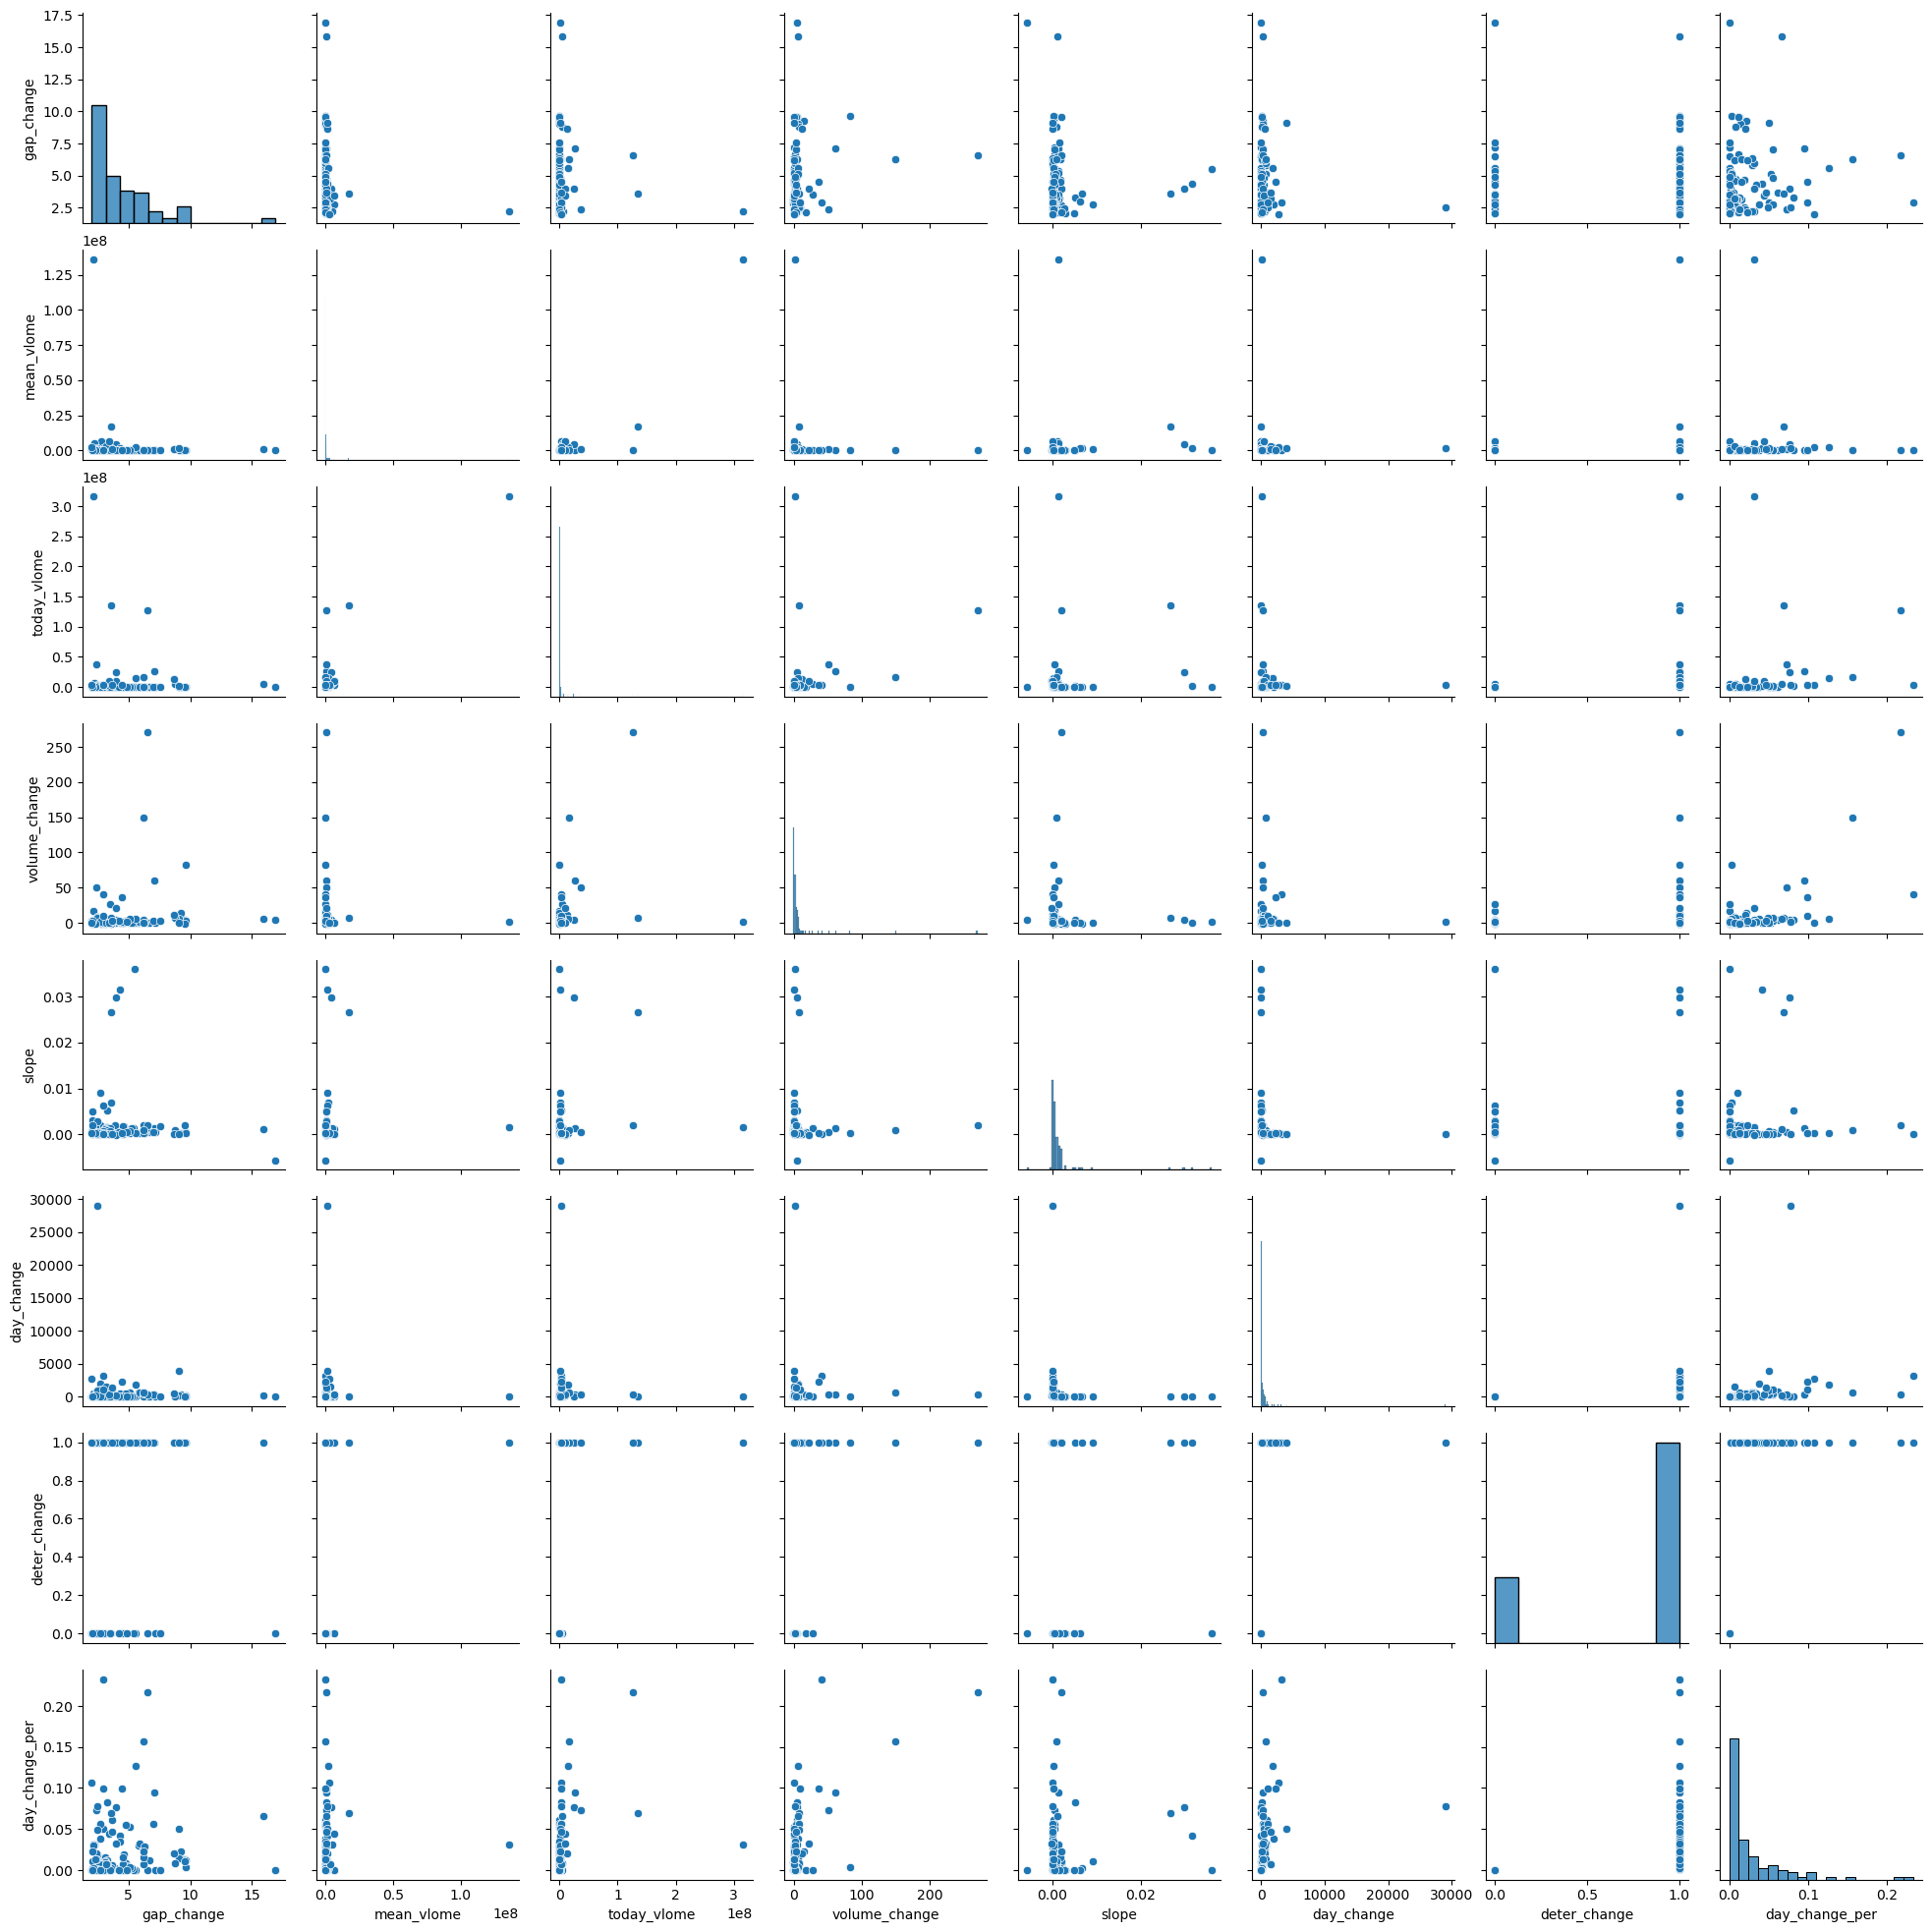

In [47]:
%matplotlib inline
sns.pairplot(data_0314)

In [48]:
model = sm.OLS.from_formula('day_change_per ~ gap_change + mean_vlome + today_vlome+  volume_change + slope ', data_0314).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         day_change_per   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     14.39
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           9.12e-11
Time:                        23:18:41   Log-Likelihood:                 231.52
No. Observations:                 113   AIC:                            -451.0
Df Residuals:                     107   BIC:                            -434.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0197      0.006      3.217      0.002       0.008       0.032
gap_change       -0.0003      0.001     -0.258      0.797      -0.003       0.002
mean_vlome    -5.454e-10   7.76e-10     -0.703      0.483   -2.08e-09    9.92e-10
today_vlome    2.904e-10   3.09e-10      0.939      0.350   -3.22e-10    9.03e-10
volume_change     0.0007      0.000      4.764      0.000       0.000       0.001
slope             0.3431      0.568      0.604      0.547      -0.783       1.469
==============================================================================
Omnibus:                       85.462   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              635.937
Skew:                           2.522   Prob(JB):                    8.09e-139
Kurtosis:                      13.470   Cond. No.                     6.95e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2023년 3월 15일

In [54]:
stock_0315 = pd.read_csv('data/20230315.csv')
data_0315 = stock_0315.iloc[:,30:]
data_0315 = data_0315.drop(index=data_0315.query('volume_change>1000000').index[0]).reset_index(drop=True)
data_0315

,gap_change,mean_vlome,today_vlome,volume_change,slope,day_change,deter_change,day_change_per
0,2.620,268431.700,219630,-0.182,0.000,2200.000,1,0.022
1,2.300,127097.778,396274,2.118,0.002,130.000,1,0.065
2,2.050,481569.889,247911,-0.485,0.007,13.000,1,0.016
3,2.660,868435.778,477843,-0.450,0.000,700.000,1,0.015
4,4.080,4130.778,683,-0.835,0.000,0.000,0,0.000
...,...,...,...,...,...,...,...,...
585,4.320,181413.625,227205,0.252,0.000,650.000,1,0.045
586,2.240,90463.778,32014,-0.646,0.001,25.000,1,0.008
587,3.310,128446.200,226173,0.761,0.000,350.000,1,0.012
588,2.220,5150.889,766,-0.851,0.002,0.000,0,0.000


In [57]:
stock_0315

,stock_code,stock_name,stock_class,gap_per,gap_hour,gap_int,stck_oprc,stck_hgpr,stck_lwpr_D_10,stck_lwpr_D_9,...,acml_vol_D_1,acml_vol_D_0,gap_change,mean_vlome,today_vlome,volume_change,slope,day_change,deter_change,day_change_per
0,000150,두산,kospi,2.620,90017,2.620,102000.000,104200.000,98600.000,98600.000,...,207245.000,219630.000,2.620,268431.700,219630,-0.182,0.000,2200.000,1,0.022
1,000180,성창기업지주,kospi,2.300,90017,2.300,2000.000,2130.000,2090.000,2140.000,...,215216.000,396274.000,2.300,127097.778,396274,2.118,0.002,130.000,1,0.065
2,000300,대유플러스,kospi,2.050,90011,2.050,798.000,811.000,844.000,869.000,...,703971.000,247911.000,2.050,481569.889,247911,-0.485,0.007,13.000,1,0.016
3,000990,DB하이텍,kospi,2.660,90023,2.660,46400.000,47100.000,45150.000,44200.000,...,595040.000,477843.000,2.660,868435.778,477843,-0.450,0.000,700.000,1,0.015
4,000995,DB하이텍1우,kospi,4.080,90018,4.080,96900.000,96900.000,94500.000,94500.000,...,1153.000,683.000,4.080,4130.778,683,-0.835,0.000,0.000,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,419080,엔젯,kospi,4.320,90016,4.320,14500.000,15150.000,15740.000,15590.000,...,752676.000,227205.000,4.320,181413.625,227205,0.252,0.000,650.000,1,0.045
587,424760,IBKS제18호스팩,kospi,2.240,90020,2.240,2965.000,2990.000,3330.000,3365.000,...,164124.000,32014.000,2.240,90463.778,32014,-0.646,0.001,25.000,1,0.008
588,425040,티이엠씨,kospi,3.310,90011,3.310,29650.000,30000.000,36550.000,36500.000,...,203668.000,226173.000,3.310,128446.200,226173,0.761,0.000,350.000,1,0.012
589,438580,엔에이치스팩25호,kospi,2.220,90005,2.220,2300.000,2300.000,2335.000,2300.000,...,2701.000,766.000,2.220,5150.889,766,-0.851,0.002,0.000,0,0.000


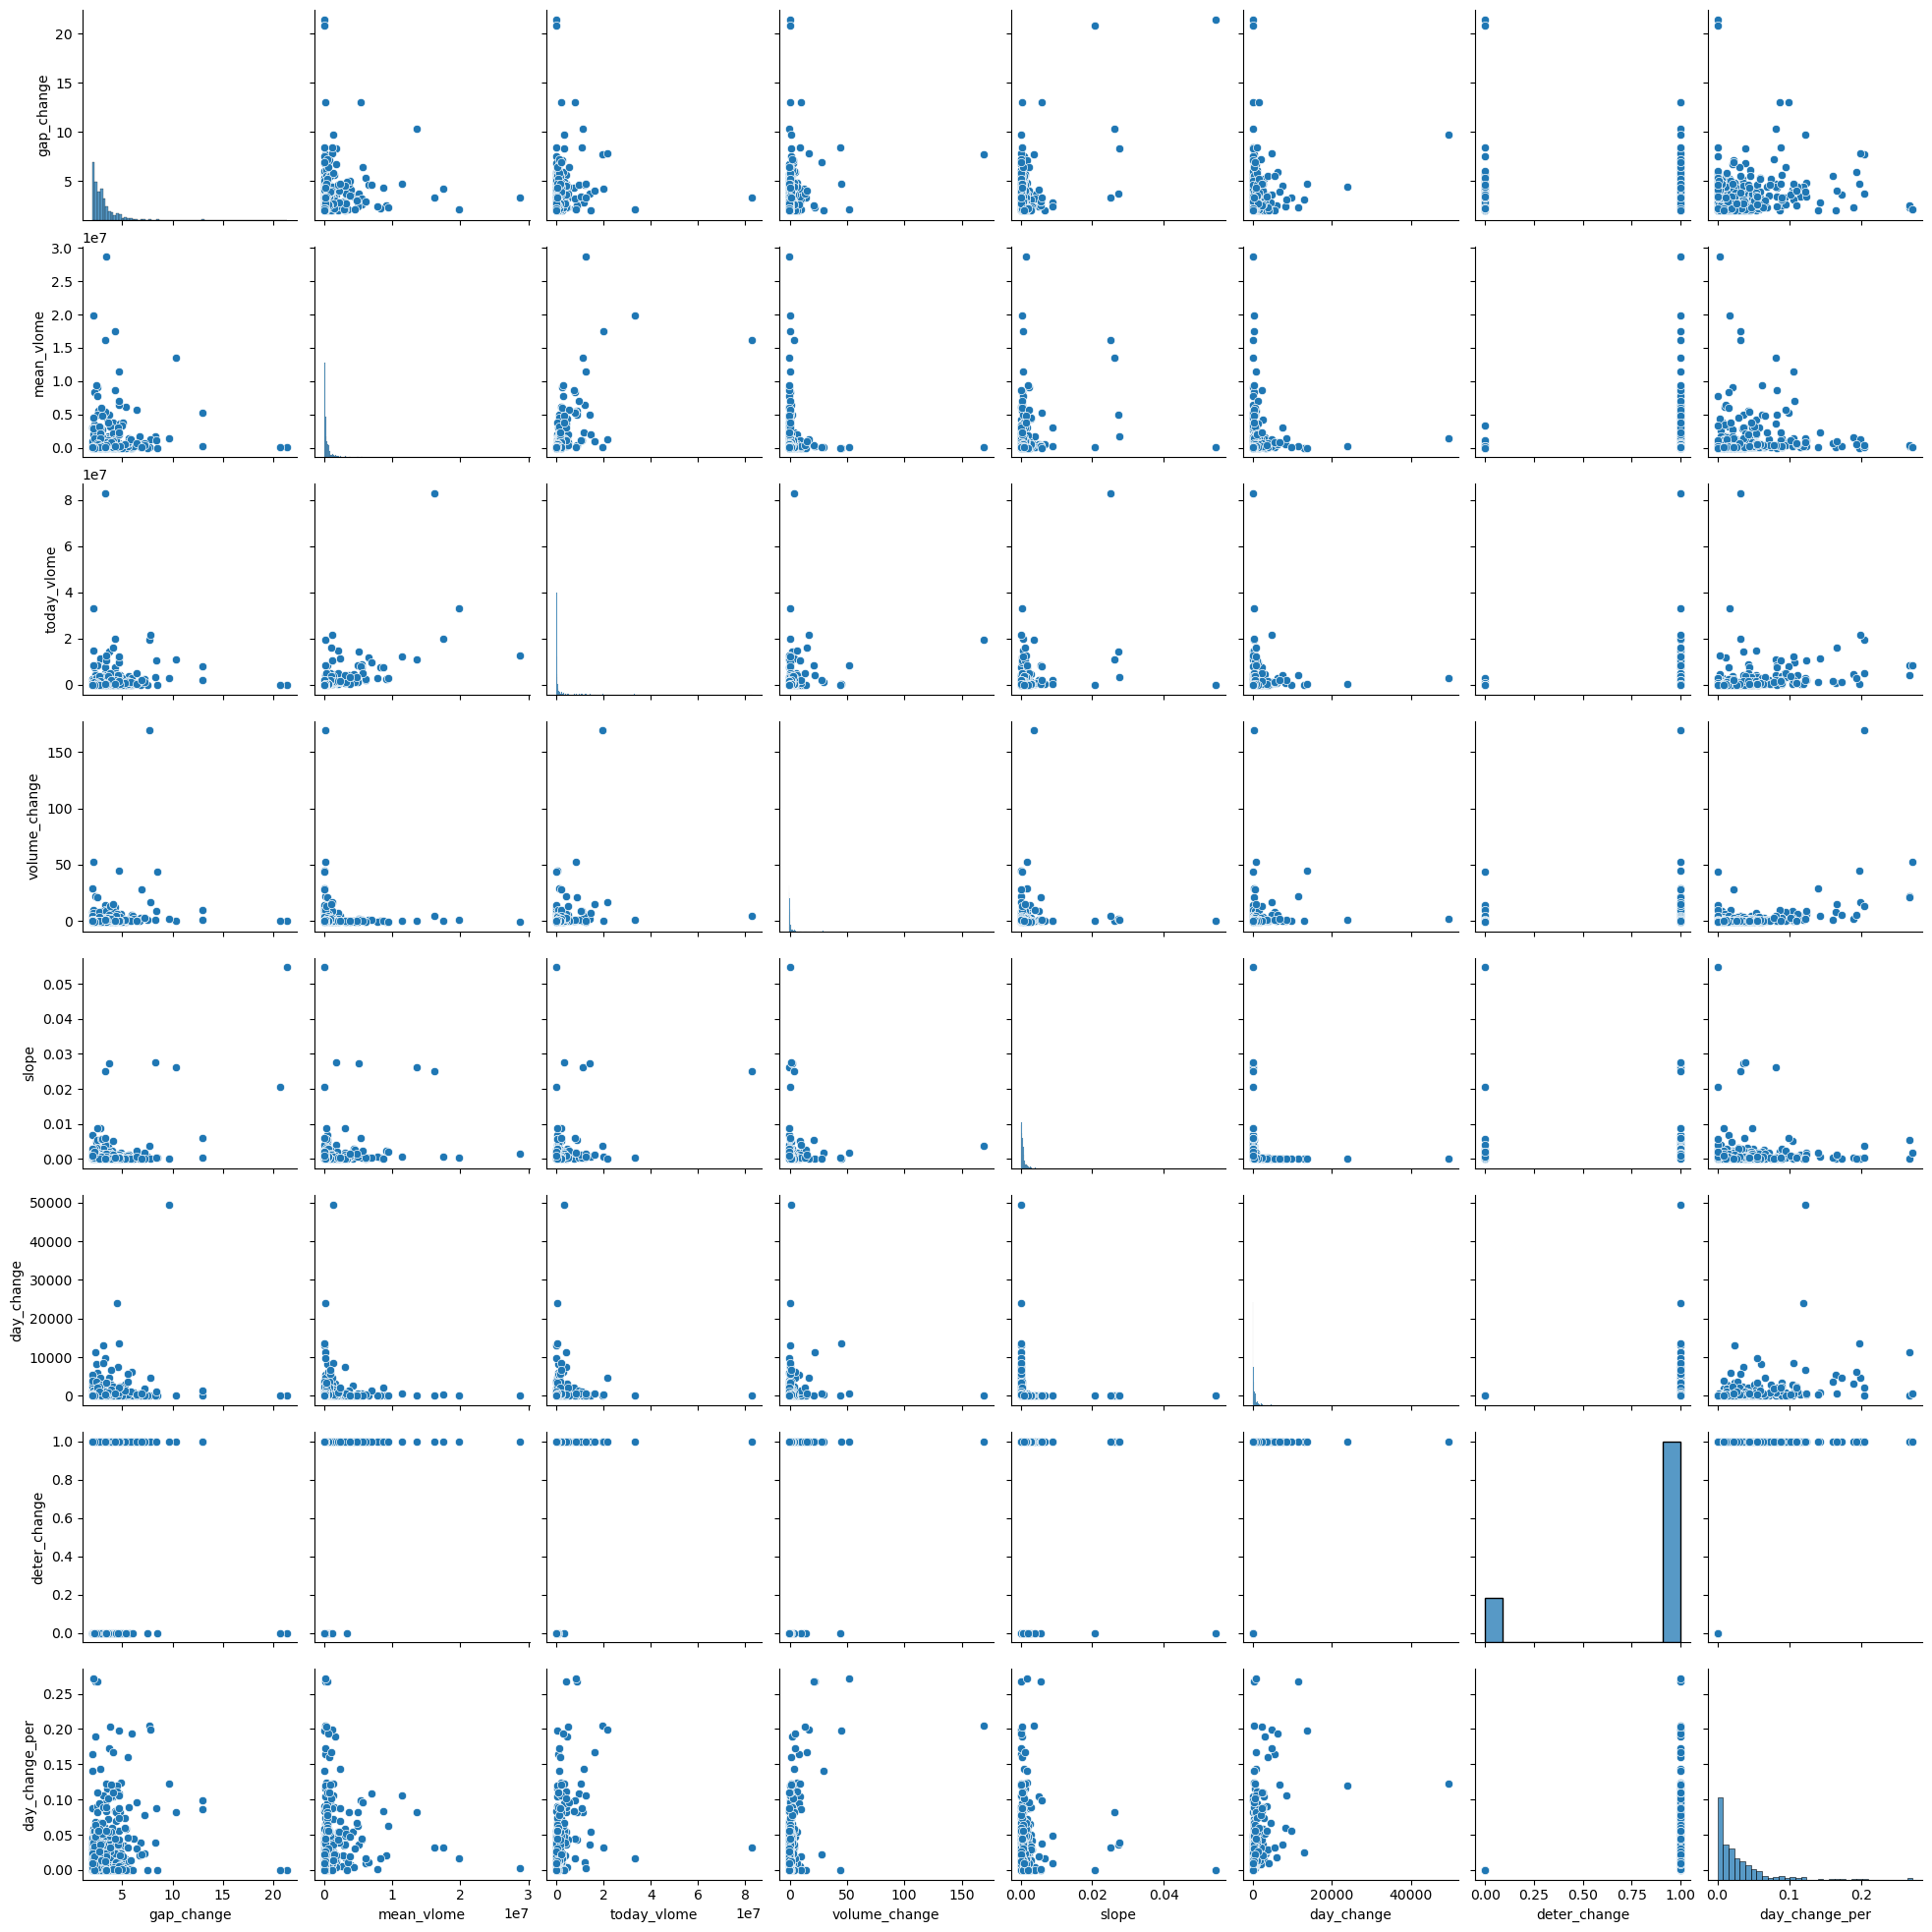

In [51]:
%matplotlib inline
sns.pairplot(data_0315)

In [55]:
model = sm.OLS.from_formula('day_change_per ~ gap_change + mean_vlome + today_vlome+  volume_change + slope ', data_0315).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         day_change_per   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     37.65
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.72e-33
Time:                        23:22:20   Log-Likelihood:                 1175.7
No. Observations:                 590   AIC:                            -2339.
Df Residuals:                     584   BIC:                            -2313.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0142      0.003      4.461      0.000       0.008       0.020
gap_change        0.0035      0.001      3.582      0.000       0.002       0.005
mean_vlome    -1.732e-10   8.24e-10     -0.210      0.834   -1.79e-09    1.44e-09
today_vlome    2.031e-09   4.44e-10      4.576      0.000    1.16e-09     2.9e-09
volume_change     0.0017      0.000      9.115      0.000       0.001       0.002
slope            -1.5848      0.510     -3.109      0.002      -2.586      -0.584
==============================================================================
Omnibus:                      266.857   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2121.761
Skew:                           1.817   Prob(JB):                         0.00
Kurtosis:                      11.550   Cond. No.                     1.79e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 누적데이터

In [59]:
stock_data = pd.concat([data_0313,data_0314,data_0315])

In [61]:
model = sm.OLS.from_formula('day_change_per ~ gap_change + mean_vlome + today_vlome+  volume_change + slope ', stock_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         day_change_per   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     30.14
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           4.45e-28
Time:                        23:32:12   Log-Likelihood:                 1506.3
No. Observations:                 793   AIC:                            -3001.
Df Residuals:                     787   BIC:                            -2972.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0197      0.002      7.906      0.000       0.015       0.025
gap_change        0.0018      0.001      2.771      0.006       0.001       0.003
mean_vlome    -9.132e-10   5.27e-10     -1.731      0.084   -1.95e-09    1.22e-10
today_vlome    6.738e-10   2.14e-10      3.154      0.002    2.54e-10    1.09e-09
volume_change     0.0007   9.89e-05      6.808      0.000       0.000       0.001
slope            -0.3035      0.381     -0.796      0.426      -1.052       0.445
==============================================================================
Omnibus:                      418.254   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3211.741
Skew:                           2.285   Prob(JB):                         0.00
Kurtosis:                      11.736   Cond. No.                     4.41e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

해야할일
1. 코스피 코스닥 추세랑 슬로피 비교
2. 필터링 항목 강화


## 2023년 3월 15일